## Build our first neural network in Keras for image classification problem

We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories shown below

Each image is 28 x 28 pixel in dimension


In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import keras

In [17]:
keras.backend.backend()

'tensorflow'

## Importing Data Set

In [18]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_test.shape

(10000, 28, 28)

## Dispaly Images

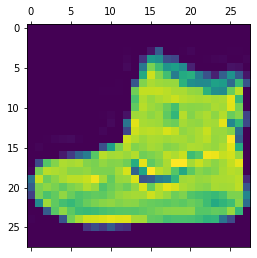

In [21]:
plt.matshow(x_train[0])

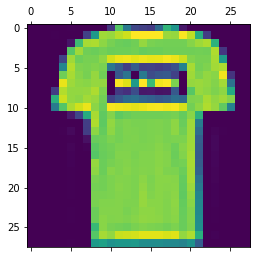

In [22]:
plt.matshow(x_train[1])

## Display Lables

In [23]:
y_train[0]

9

In [24]:
y_train[1]

0

## Normalize Data Set

Dataset contain a value from 0-255, we want to convert it into 1

In [25]:
x_train=x_train/255
x_test=x_test/255

## Keras Sequential Model

Building a linear stack of Neural Network Layer

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [55]:
model = Sequential()

## Flatten converting a 2D Array into 1D Array

In [56]:
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(200, activation="relu"))        # Hidden Layer , 20 neurons
model.add(Dense(10, activation="softmax"))        # Output Layer is 10 {Categories}

### Softmax activation function distributing set of numbers into a probability of avialable classification classes

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


## Compiling Model

In [58]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [59]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.4941 - accuracy: 0.8260
Epoch 2/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.3705 - accuracy: 0.8657
Epoch 3/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.3285 - accuracy: 0.8805
Epoch 4/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3073 - accuracy: 0.8870
Epoch 5/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.2887 - accuracy: 0.8932


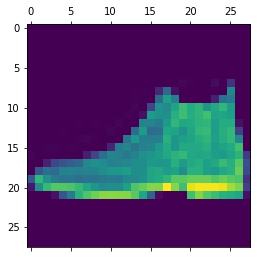

In [60]:
plt.matshow(x_test[0])

In [61]:
x_test.shape

(10000, 28, 28)

In [62]:
yp = model.predict(x_test)

In [69]:
yp[0]

array([6.60099067e-06, 1.18821175e-08, 1.27185695e-06, 1.87401721e-08,
       1.17229462e-07, 6.25591818e-03, 3.60790091e-06, 5.71579374e-02,
       2.04702224e-06, 9.36572492e-01], dtype=float32)

In [70]:
np.argmax(yp[0])

9

In [64]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [65]:
class_labels[np.argmax(yp[0])]

'Ankle boot'

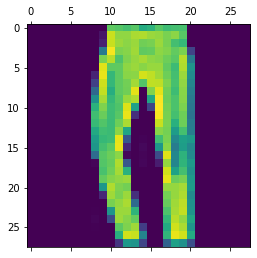

In [66]:
plt.matshow(x_test[5])

In [72]:
yp[5]

array([5.1965697e-05, 9.9993765e-01, 2.6041171e-06, 2.2100537e-06,
       4.3276491e-06, 1.6341635e-12, 1.0213071e-06, 9.0186119e-14,
       6.1458977e-08, 4.9759245e-11], dtype=float32)

In [74]:
np.argmax(yp[5])

1

In [73]:
class_labels[np.argmax(yp[5])]

'Trouser'

In [68]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 30us/step


[0.34574629986286165, 0.8752999901771545]

# The accuracy of out model is 87.52% and Loss is 34.57%